In [50]:
import pandas as pd

# Загрузка всех файлов CSV в pandas DataFrame
test_double_int_load_results = pd.read_csv('results/test_double_int_load_results.csv')
test_double_int_results = pd.read_csv('results/test_double_int_results.csv')
test_double_string_load_results = pd.read_csv('results/test_double_string_load_results.csv')
test_double_string_results = pd.read_csv('results/test_double_string_results.csv')

test_int_results = pd.read_csv('results/test_int_results.csv')
test_string_load_results = pd.read_csv('results/test_string_load_results.csv')
test_string_results = pd.read_csv('results/test_string_results.csv')


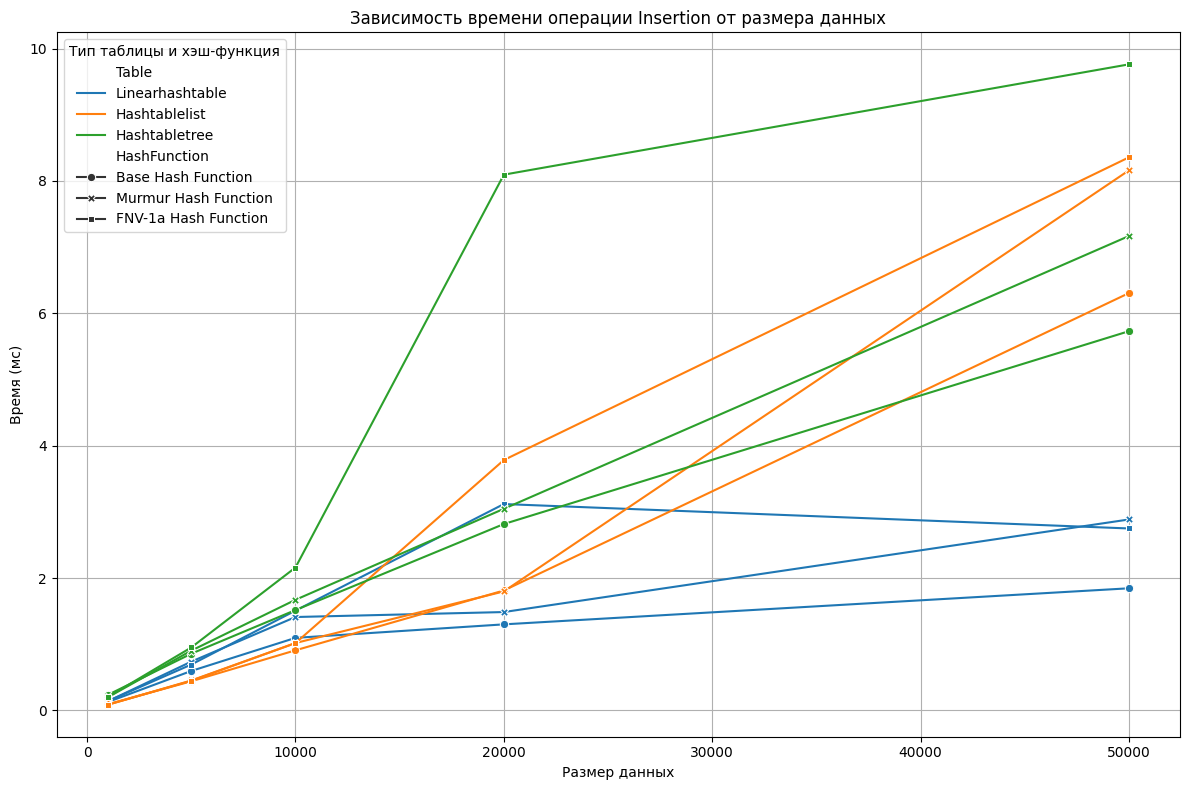

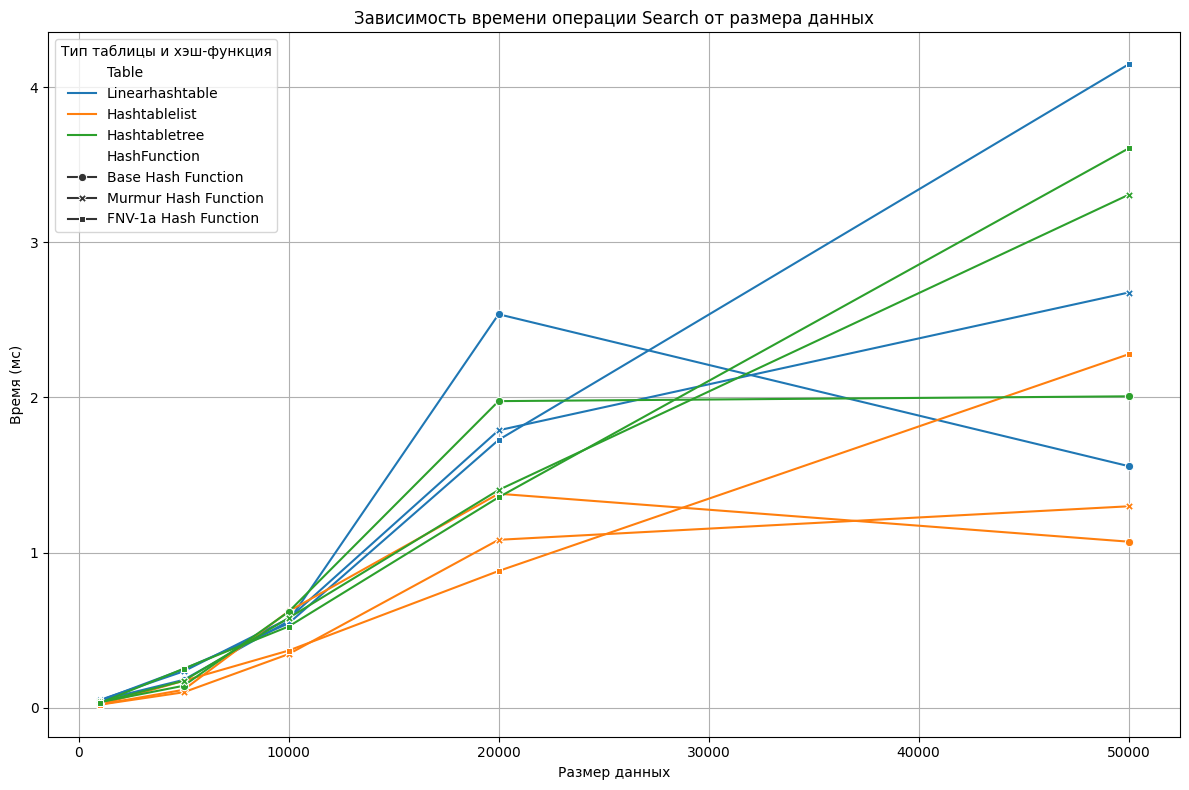

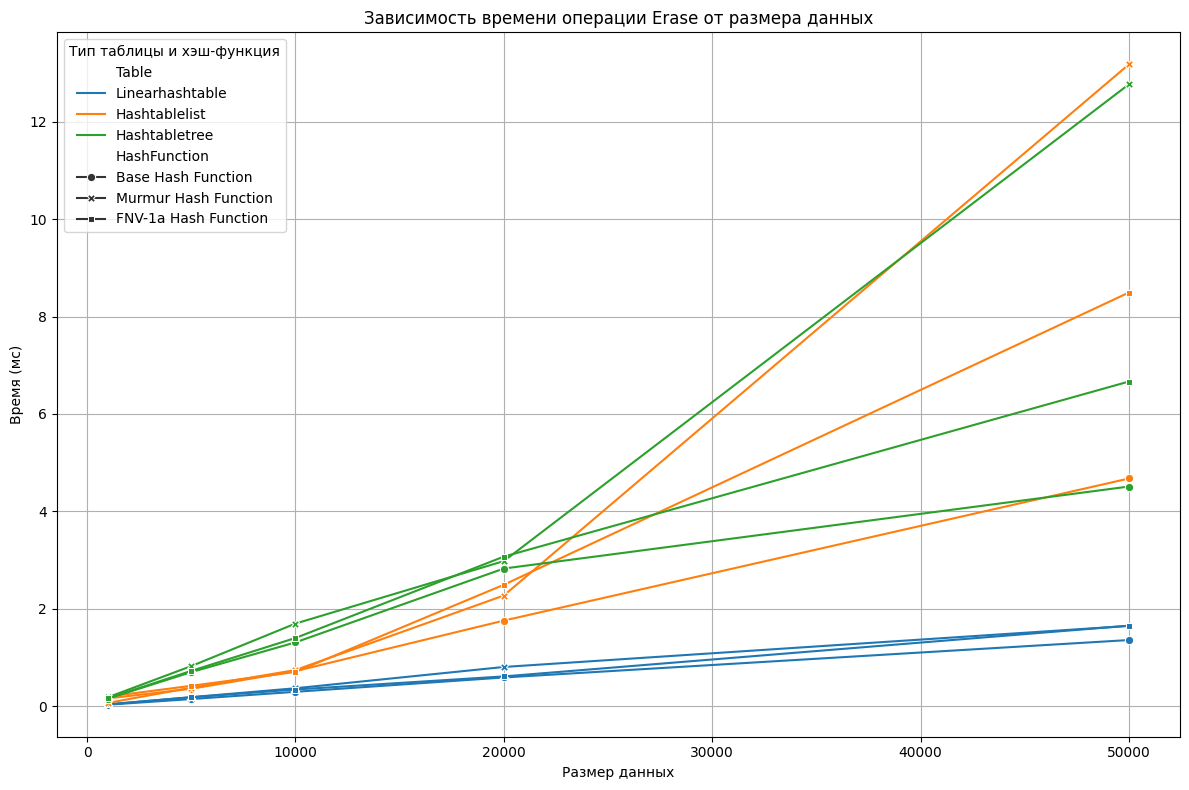

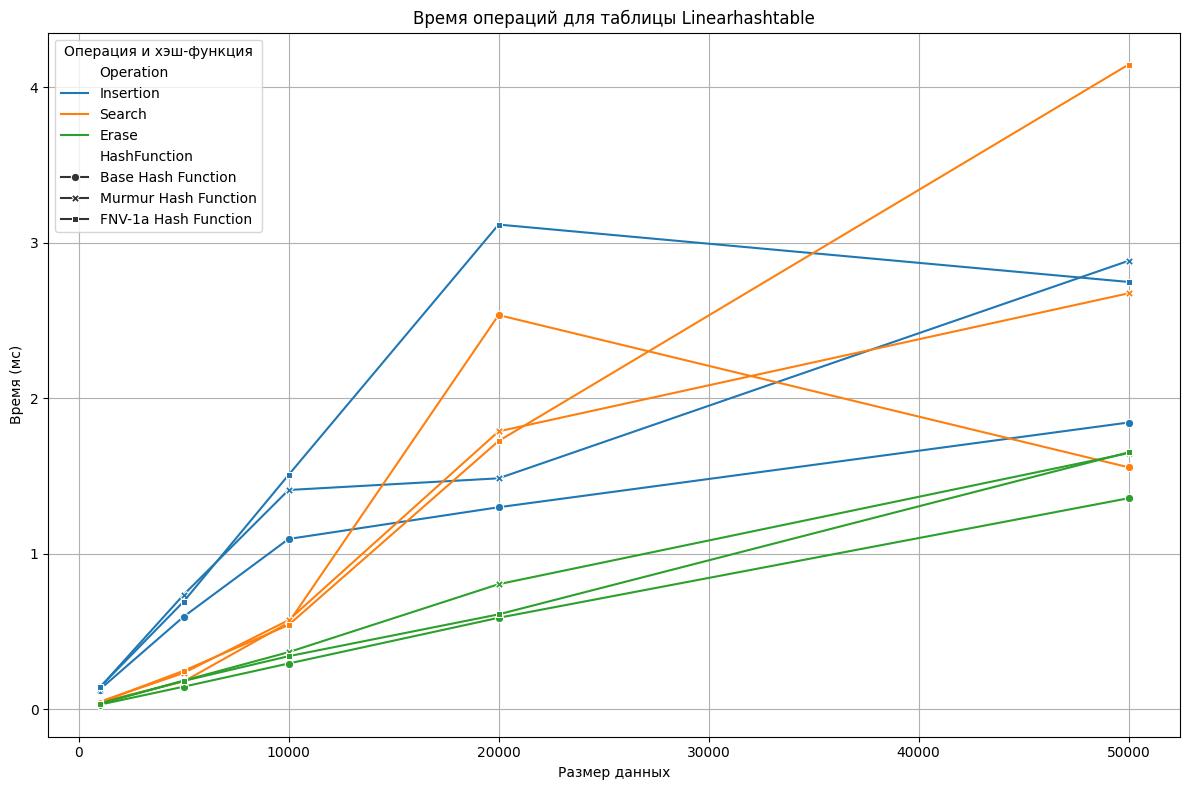

C:\Users\buddy\AppData\Local\Temp\ipykernel_21764\3848239073.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Table', y='Time(ms)', hue='Operation', ci=None)


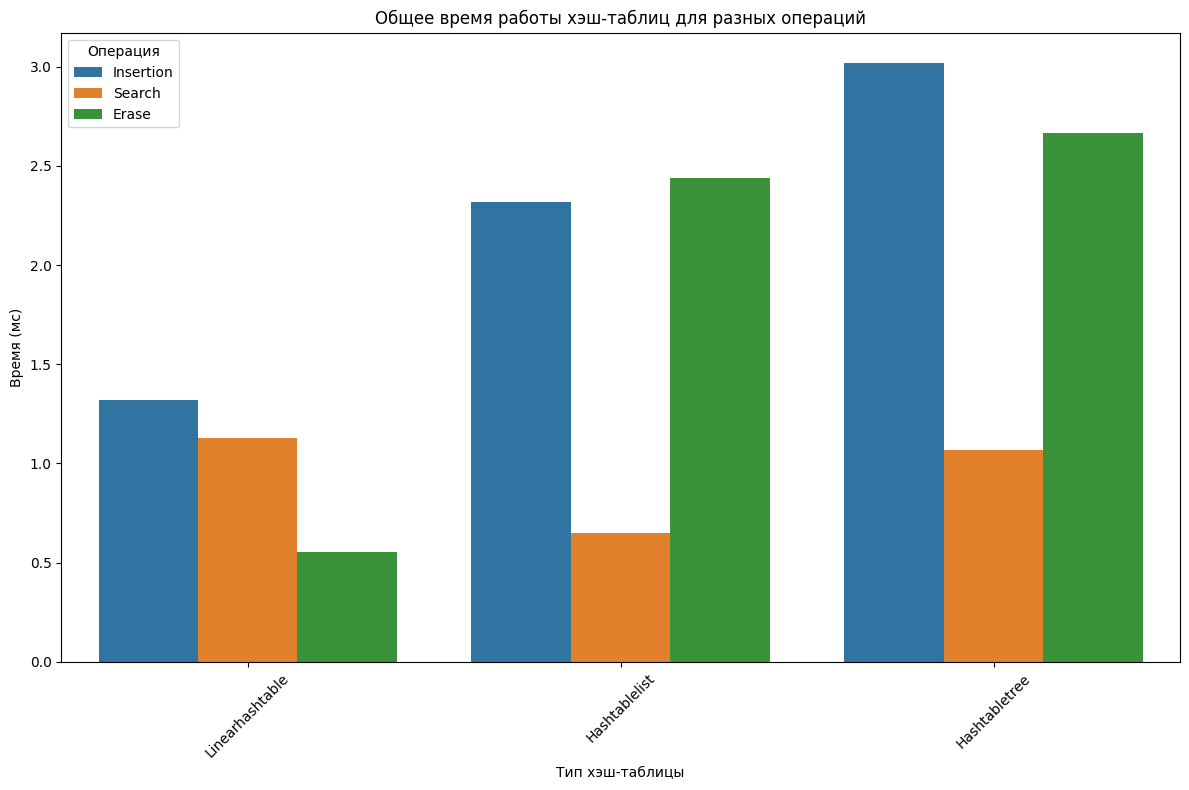

C:\Users\buddy\AppData\Local\Temp\ipykernel_21764\3848239073.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='HashFunction', y='Time(ms)', hue='Operation', ci=None)


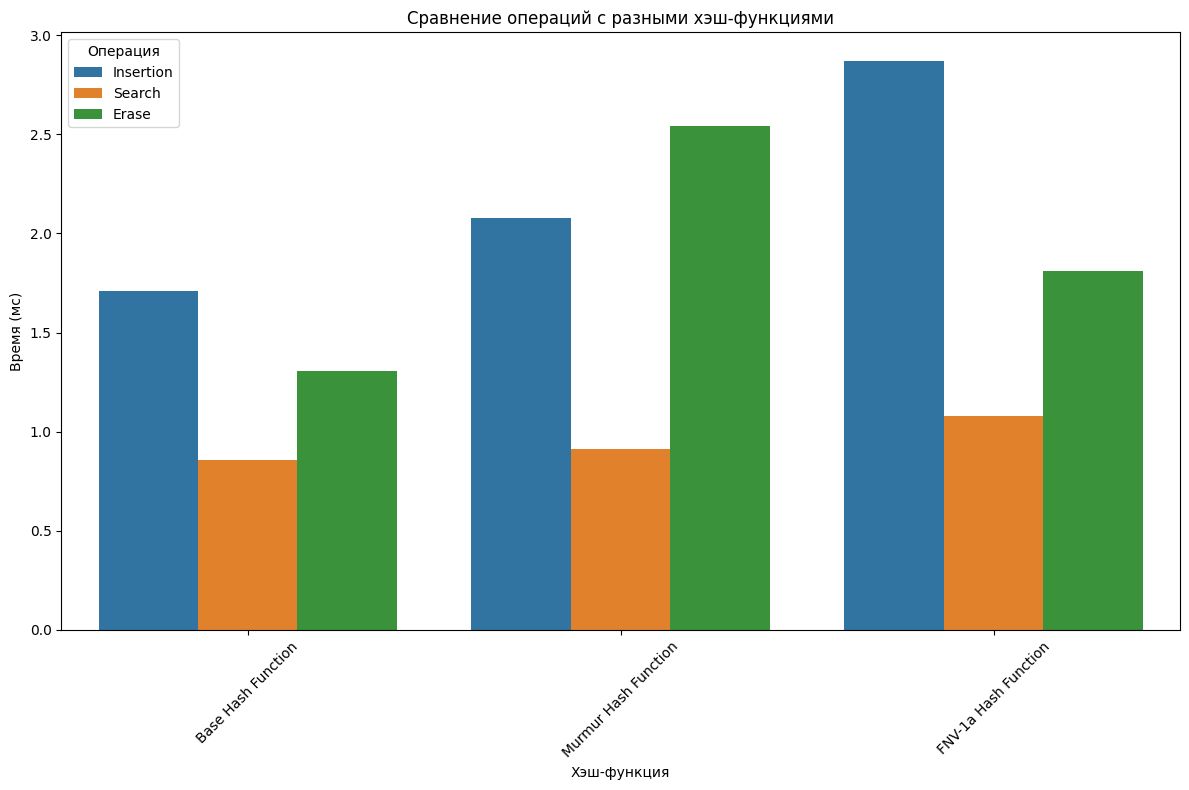

C:\Users\buddy\AppData\Local\Temp\ipykernel_21764\3848239073.py:71: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Table', y='Time(ms)', hue='Operation', ci=None)


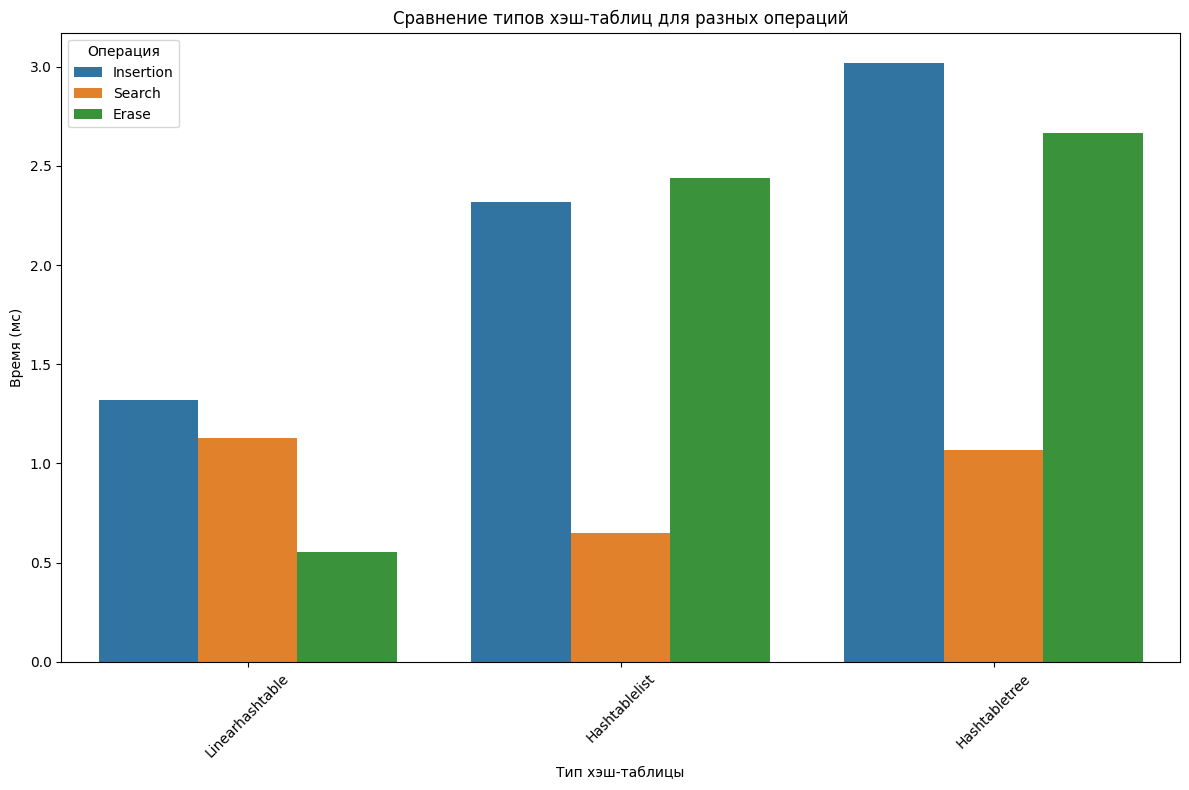

C:\Users\buddy\AppData\Local\Temp\ipykernel_21764\3848239073.py:82: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


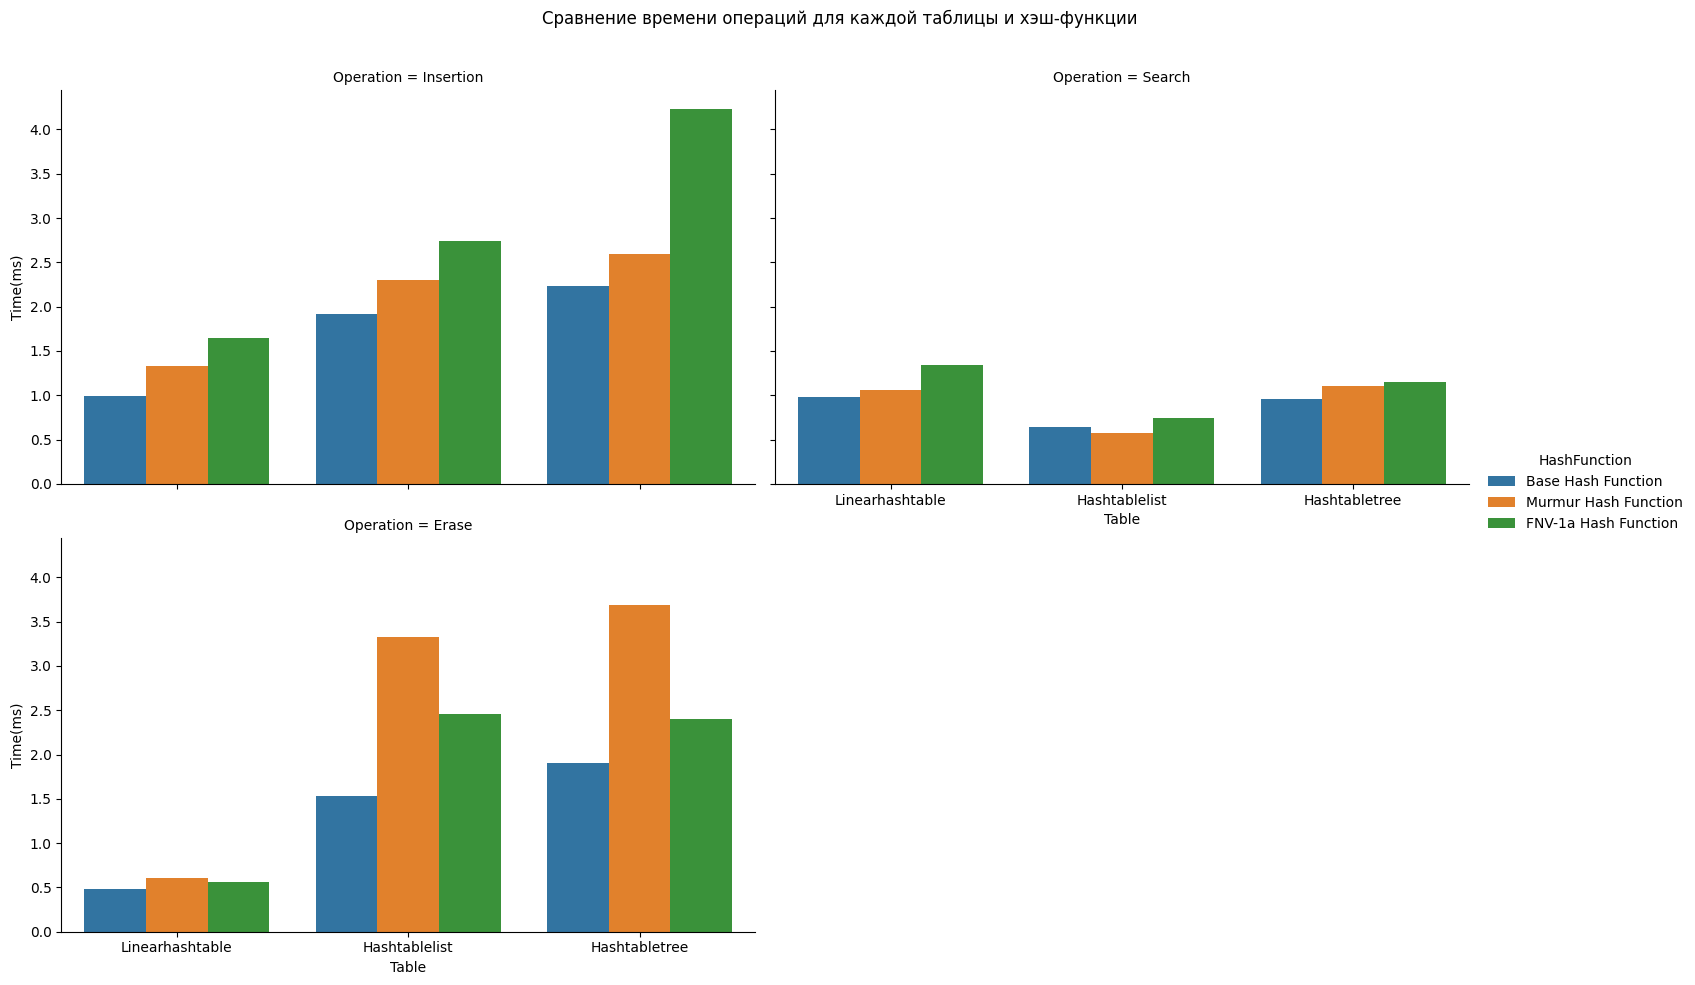

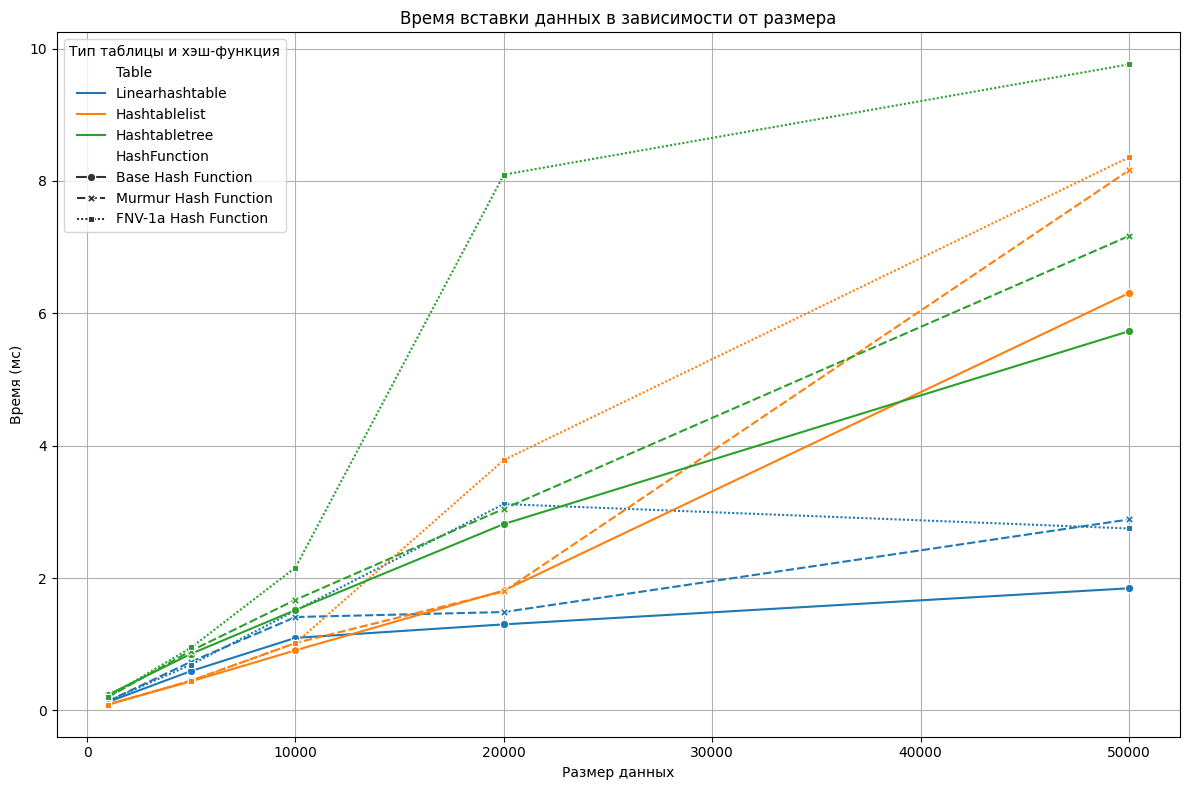

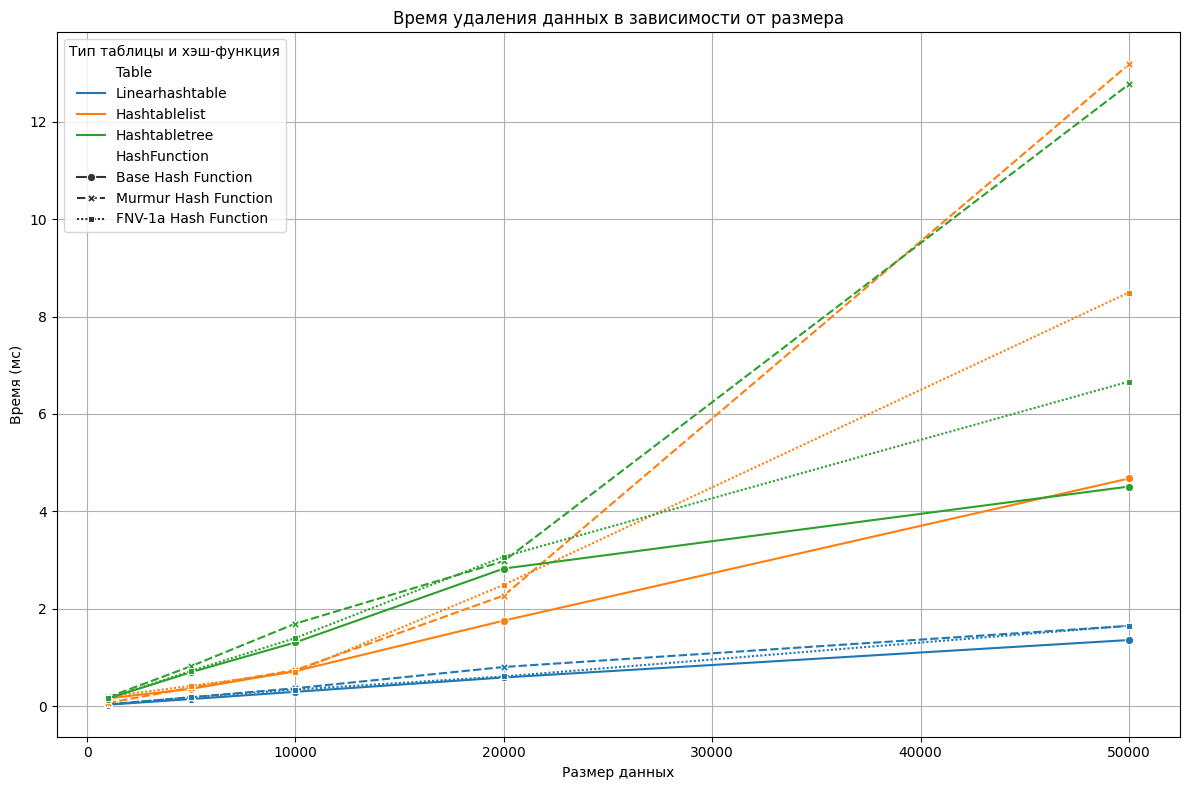

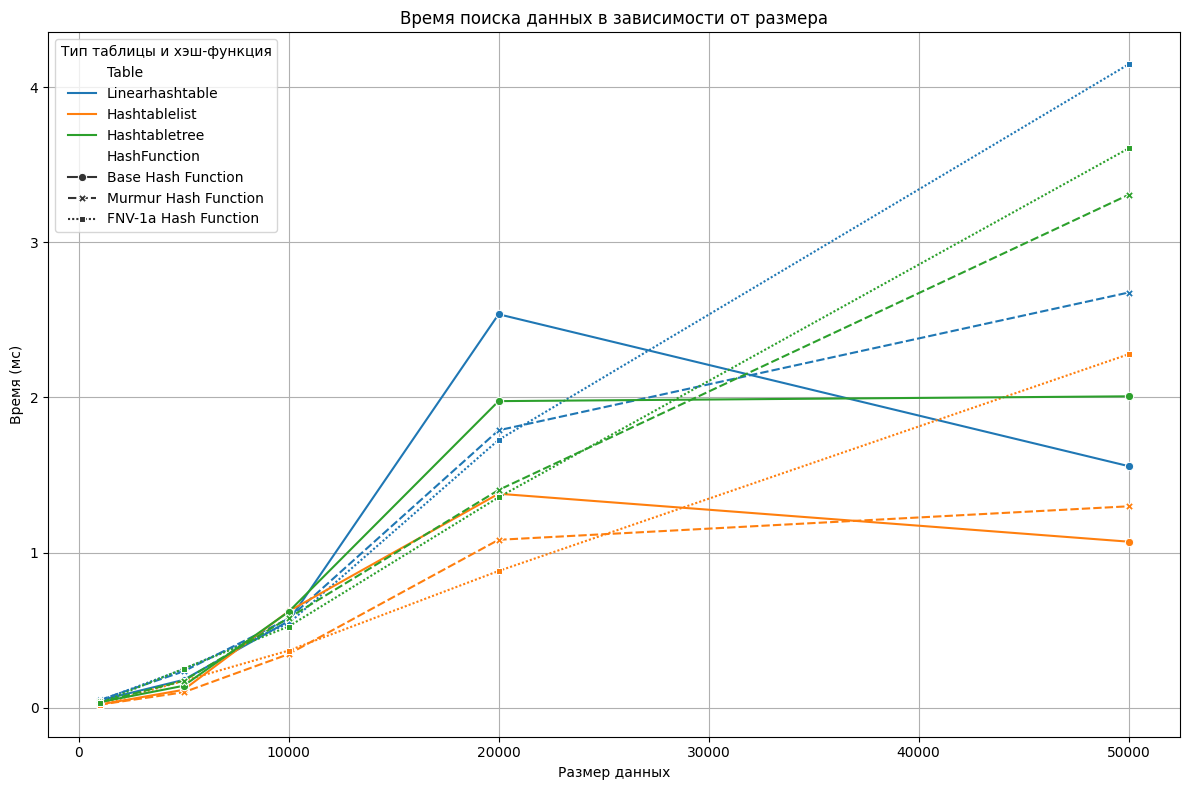

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV (например, test_int_results.csv)
df = pd.read_csv('results/test_int_results.csv')

# Предварительная обработка данных
df['Operation'] = df['Operation'].str.capitalize()  # Преобразование операций в удобный формат
df['Table'] = df['Table'].str.capitalize()  # Преобразование типов таблиц

# 1. Разделение на отдельные графики по операциям
def plot_time_by_data_size_per_operation(df):
    operations = df['Operation'].unique()
    for operation in operations:
        plt.figure(figsize=(12, 8))
        sns.lineplot(
            data=df[df['Operation'] == operation],
            x='DataSize', y='Time(ms)', hue='Table', style='HashFunction', markers=True, dashes=False
        )
        plt.title(f'Зависимость времени операции {operation} от размера данных')
        plt.xlabel('Размер данных')
        plt.ylabel('Время (мс)')
        plt.legend(title='Тип таблицы и хэш-функция', loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 2. Упрощённый общий график для одной таблицы
def plot_time_for_single_table(df, table_name):
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df[df['Table'] == table_name],
        x='DataSize', y='Time(ms)', hue='Operation', style='HashFunction', markers=True, dashes=False
    )
    plt.title(f'Время операций для таблицы {table_name}')
    plt.xlabel('Размер данных')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция и хэш-функция', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 3. Общий график времени для всех таблиц и операций
def plot_overall_comparison(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Table', y='Time(ms)', hue='Operation', ci=None)
    plt.title('Общее время работы хэш-таблиц для разных операций')
    plt.xlabel('Тип хэш-таблицы')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Время операций с разными хэш-функциями
def plot_time_by_hash_function(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='HashFunction', y='Time(ms)', hue='Operation', ci=None)
    plt.title('Сравнение операций с разными хэш-функциями')
    plt.xlabel('Хэш-функция')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Сравнение таблиц для разных операций
def plot_table_comparison_by_operation(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Table', y='Time(ms)', hue='Operation', ci=None)
    plt.title('Сравнение типов хэш-таблиц для разных операций')
    plt.xlabel('Тип хэш-таблицы')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 6. Новый комбинированный график
def plot_combined_comparison(df):
    g = sns.catplot(
        data=df, x='Table', y='Time(ms)', hue='HashFunction',
        col='Operation', kind='bar', ci=None, col_wrap=2, height=5, aspect=1.5
    )
    g.fig.subplots_adjust(top=0.9)  # Регулировка для добавления заголовка
    g.fig.suptitle('Сравнение времени операций для каждой таблицы и хэш-функции')
    plt.show()

# 7. Простой график времени вставки
def plot_insertion_time(df):
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df[df['Operation'] == 'Insertion'], x='DataSize', y='Time(ms)', hue='Table', style='HashFunction', markers=True)
    plt.title('Время вставки данных в зависимости от размера')
    plt.xlabel('Размер данных')
    plt.ylabel('Время (мс)')
    plt.legend(title='Тип таблицы и хэш-функция', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 8. Простой график времени удаления
def plot_erase_time(df):
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df[df['Operation'] == 'Erase'], x='DataSize', y='Time(ms)', hue='Table', style='HashFunction', markers=True)
    plt.title('Время удаления данных в зависимости от размера')
    plt.xlabel('Размер данных')
    plt.ylabel('Время (мс)')
    plt.legend(title='Тип таблицы и хэш-функция', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 9. Простой график времени поиска
def plot_search_time(df):
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=df[df['Operation'] == 'Search'], x='DataSize', y='Time(ms)', hue='Table', style='HashFunction', markers=True)
    plt.title('Время поиска данных в зависимости от размера')
    plt.xlabel('Размер данных')
    plt.ylabel('Время (мс)')
    plt.legend(title='Тип таблицы и хэш-функция', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Вызов функций для построения графиков
plot_time_by_data_size_per_operation(df)  # График 1: Разделение по операциям
plot_time_for_single_table(df, 'Linearhashtable')  # График 2: Для одной таблицы (замени на нужную)
plot_overall_comparison(df)  # График 3: Общий график времени работы
plot_time_by_hash_function(df)  # График 4: Время операций для хэш-функций
plot_table_comparison_by_operation(df)  # График 5: Сравнение таблиц по операциям
plot_combined_comparison(df)  # График 6: Новый комбинированный график
plot_insertion_time(df)  # Простой график 7: Время вставки
plot_erase_time(df)  # Простой график 8: Время удаления
plot_search_time(df)  # Простой график 9: Время поиска


C:\Users\buddy\AppData\Local\Temp\ipykernel_21764\2654027518.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Table', y='Time(ms)', hue='Operation', ci=None)


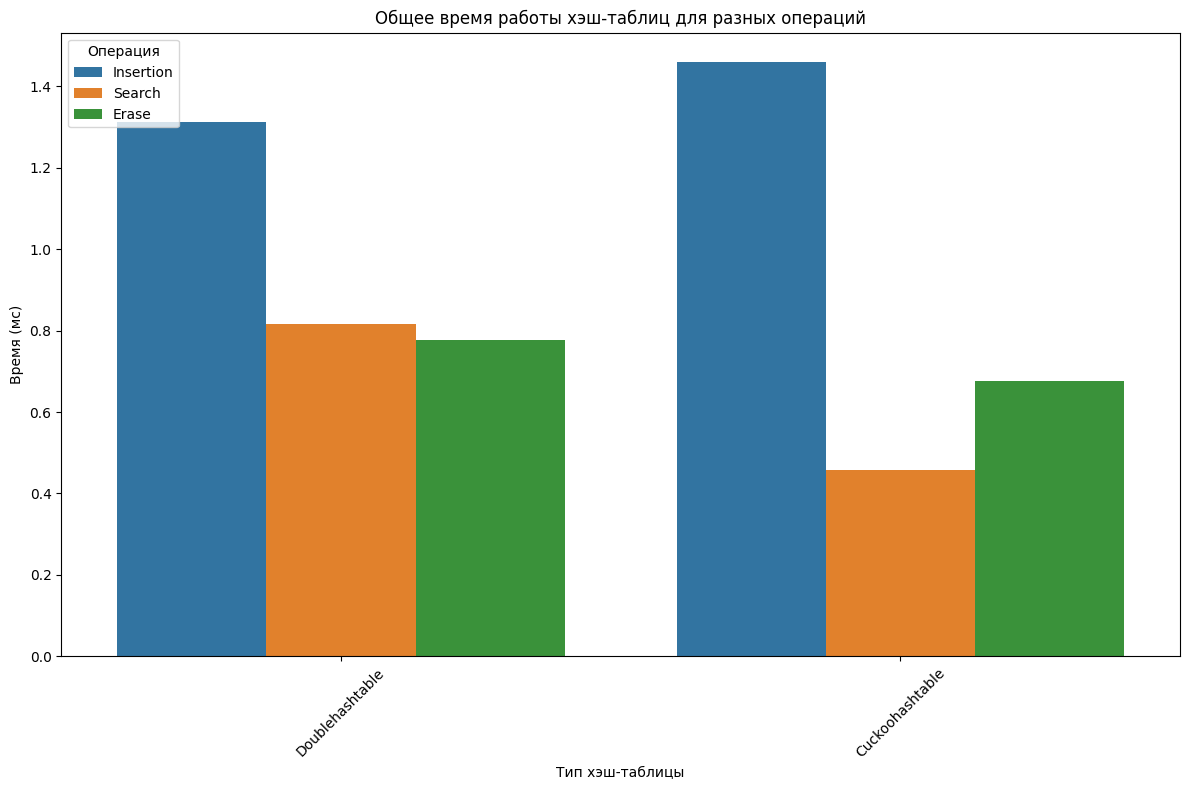

C:\Users\buddy\AppData\Local\Temp\ipykernel_21764\2654027518.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='HashFunctions', y='Time(ms)', hue='Operation', ci=None)


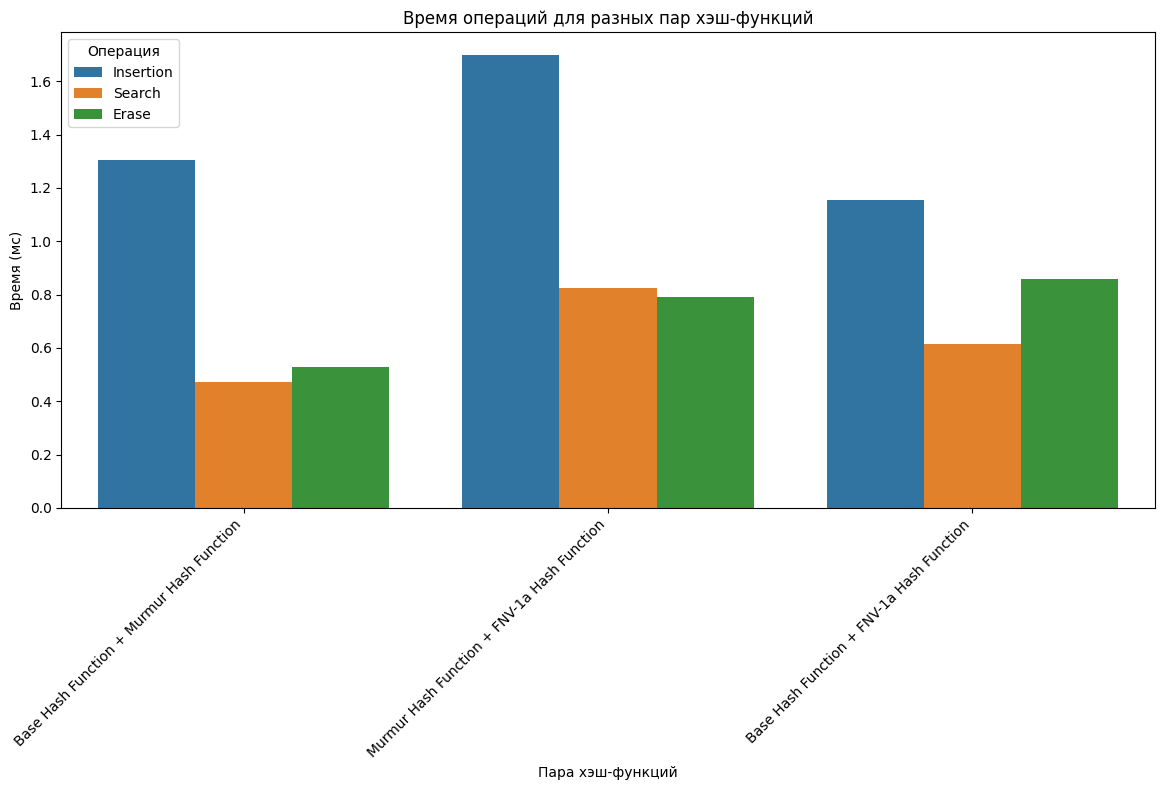

C:\Users\buddy\AppData\Local\Temp\ipykernel_21764\2654027518.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Table', y='Time(ms)', hue='HashFunctions', ci=None)


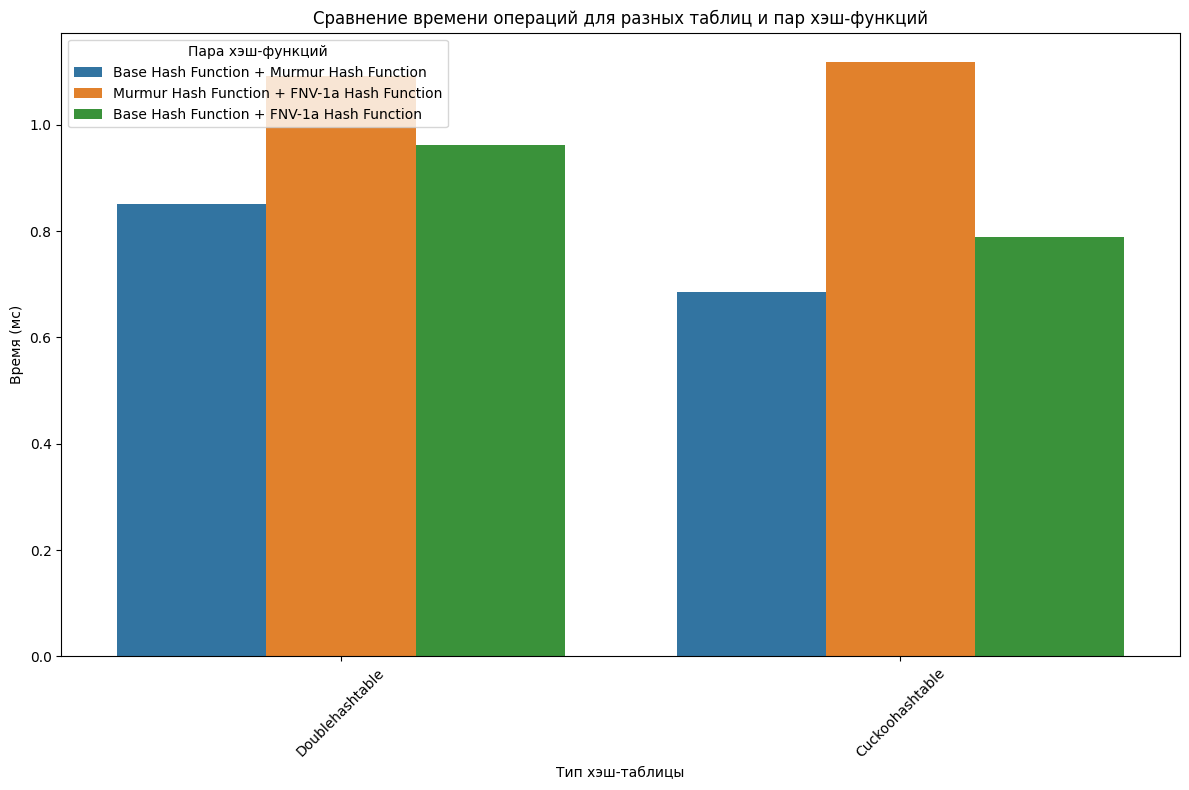

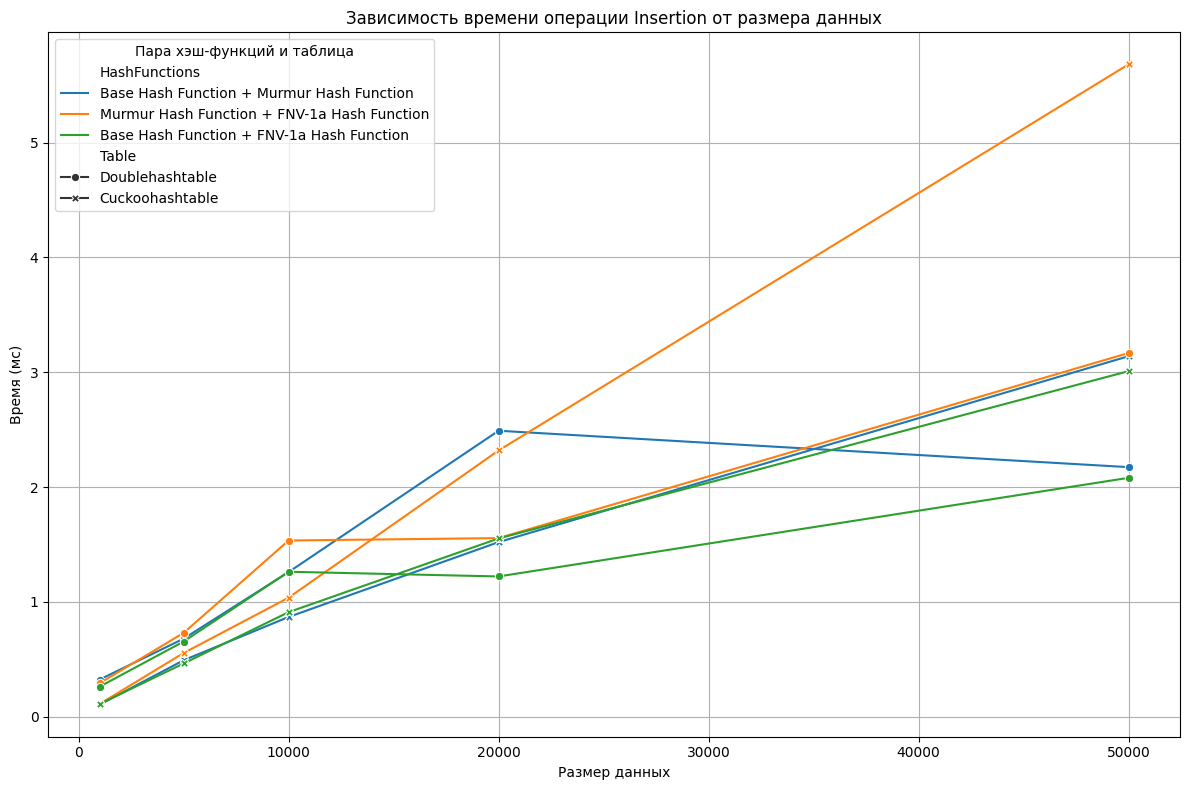

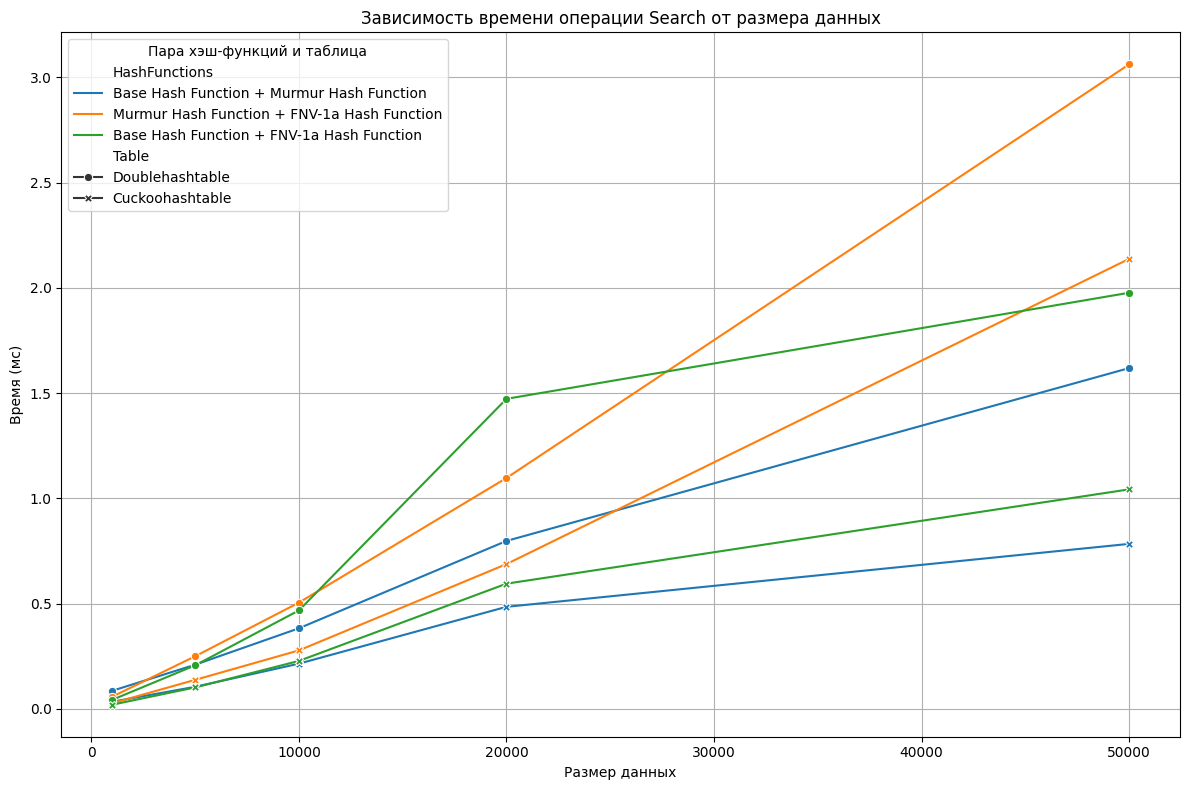

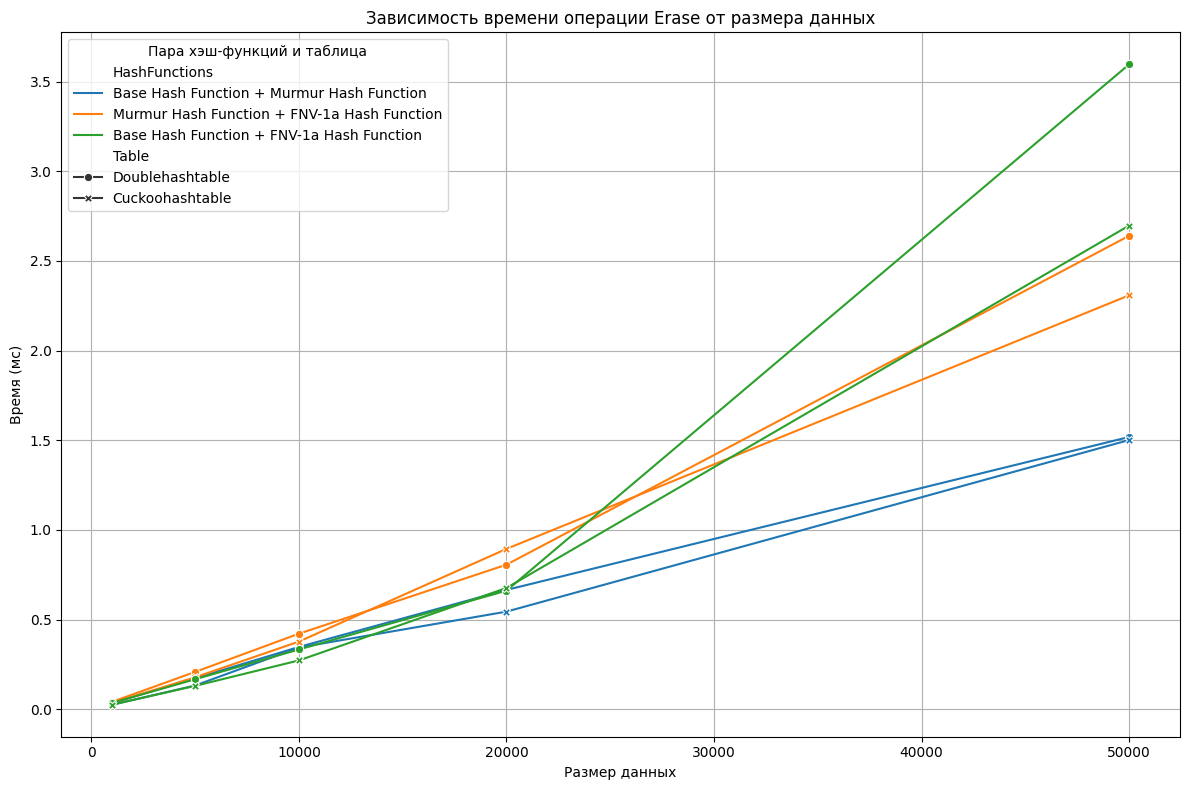

C:\Users\buddy\AppData\Local\Temp\ipykernel_21764\2654027518.py:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


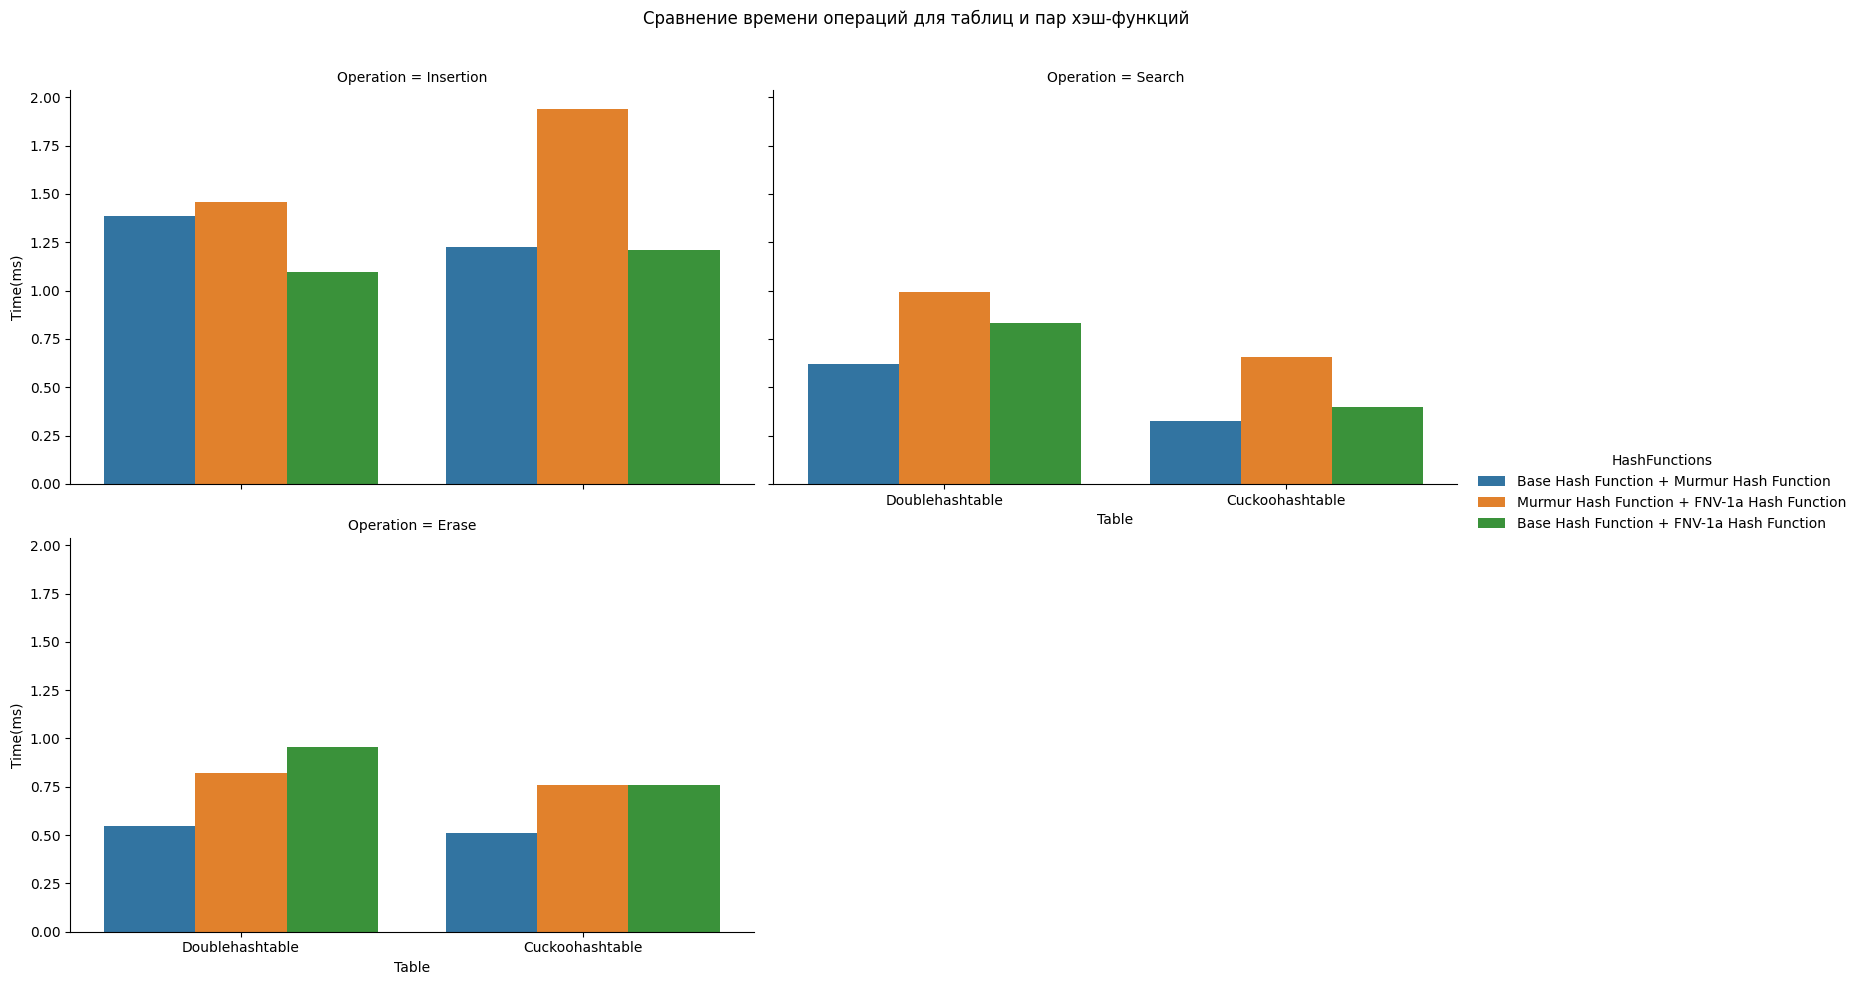

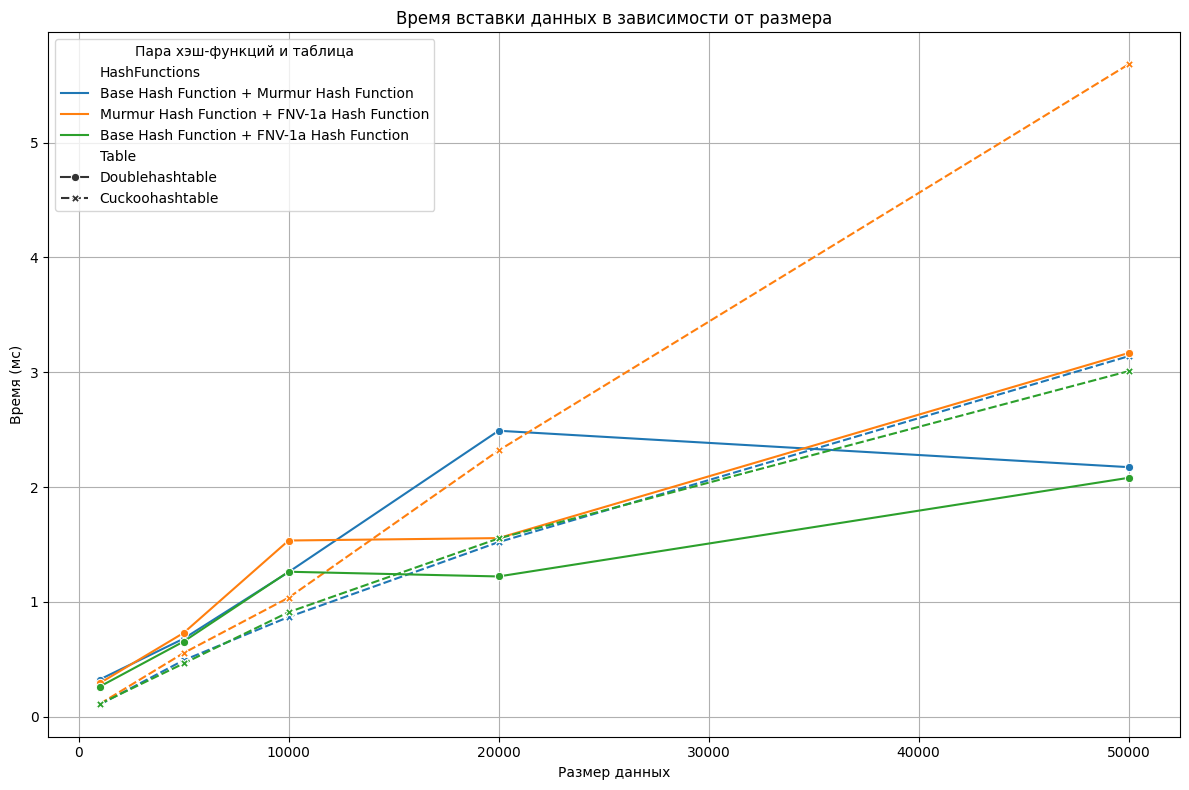

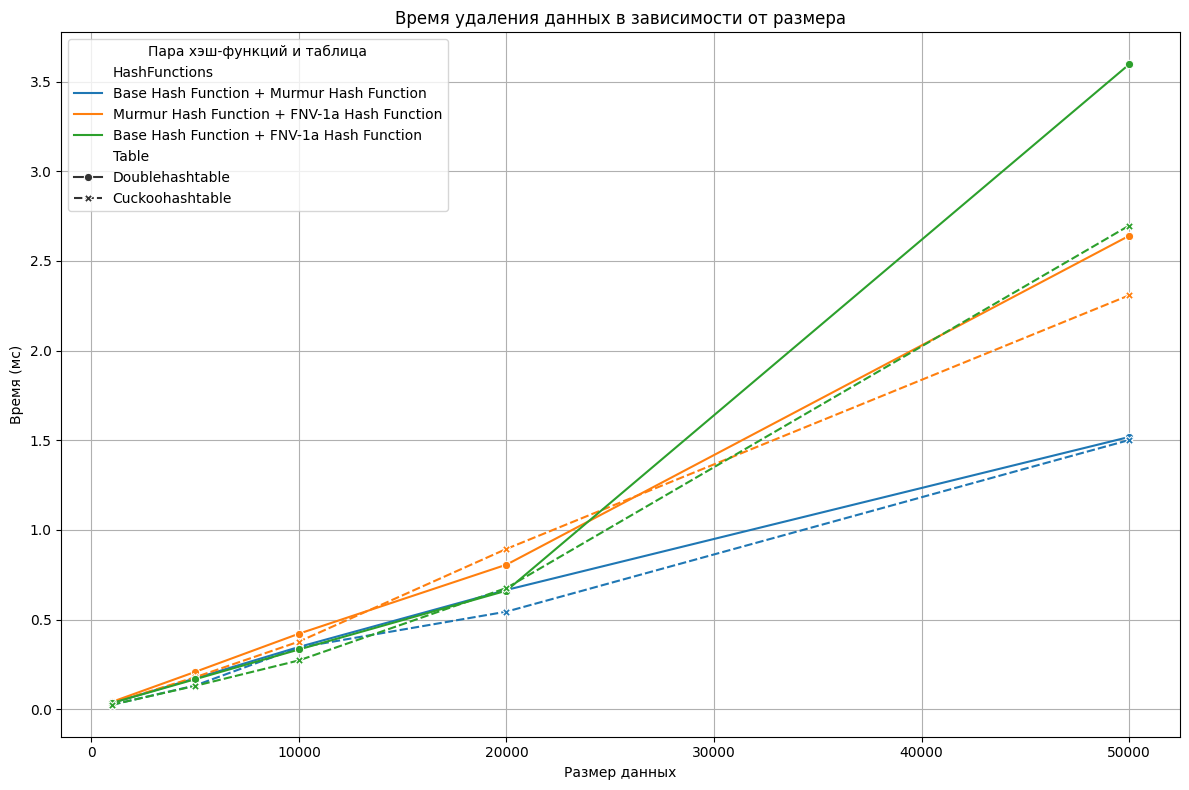

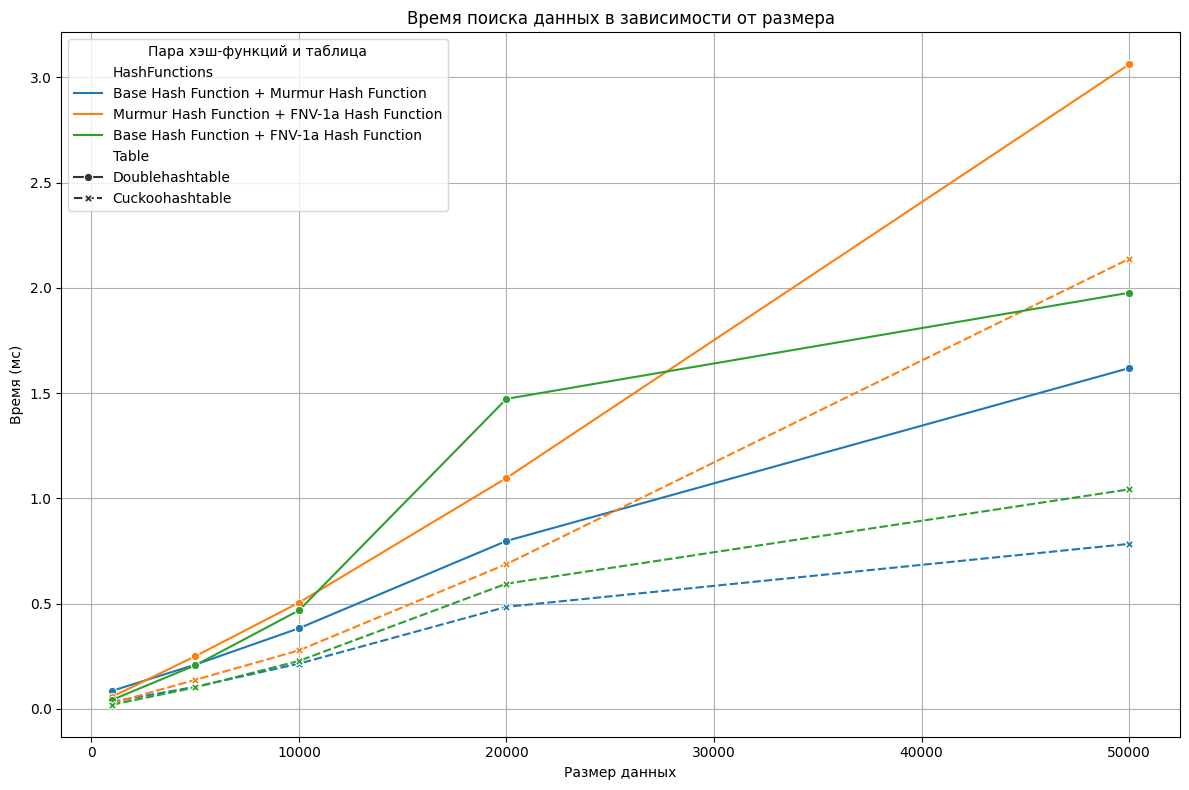

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из CSV
df = pd.read_csv('results/test_double_int_results.csv')

# Предварительная обработка данных
df['Operation'] = df['Operation'].str.capitalize()  # Преобразование операций в удобный формат
df['Table'] = df['Table'].str.capitalize()  # Преобразование типов таблиц

# Добавляем новый столбец для объединения двух хэш-функций
df['HashFunctions'] = df['HashFunction1'] + " + " + df['HashFunction2']

# 1. Визуализация общего времени работы хэш-таблиц
def plot_total_time(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Table', y='Time(ms)', hue='Operation', ci=None)
    plt.title('Общее время работы хэш-таблиц для разных операций')
    plt.xlabel('Тип хэш-таблицы')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2. Визуализация времени операций с учётом пар хэш-функций
def plot_time_by_hash_functions(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='HashFunctions', y='Time(ms)', hue='Operation', ci=None)
    plt.title('Время операций для разных пар хэш-функций')
    plt.xlabel('Пара хэш-функций')
    plt.ylabel('Время (мс)')
    plt.legend(title='Операция', loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3. Визуализация времени операций для каждой таблицы
def plot_time_by_table(df):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Table', y='Time(ms)', hue='HashFunctions', ci=None)
    plt.title('Сравнение времени операций для разных таблиц и пар хэш-функций')
    plt.xlabel('Тип хэш-таблицы')
    plt.ylabel('Время (мс)')
    plt.legend(title='Пара хэш-функций', loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Зависимость времени операций от размера данных
def plot_time_by_data_size(df):
    operations = df['Operation'].unique()
    for operation in operations:
        plt.figure(figsize=(12, 8))
        sns.lineplot(
            data=df[df['Operation'] == operation],
            x='DataSize', y='Time(ms)', hue='HashFunctions', style='Table', markers=True, dashes=False
        )
        plt.title(f'Зависимость времени операции {operation} от размера данных')
        plt.xlabel('Размер данных')
        plt.ylabel('Время (мс)')
        plt.legend(title='Пара хэш-функций и таблица', loc='upper left')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 5. Сравнение времени операций для каждой пары хэш-функций
def plot_comparison_by_operation_and_functions(df, operation):
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=df[df['Operation'] == operation],
        x='HashFunctions', y='Time(ms)', hue='Table', ci=None
    )
    plt.title(f'Сравнение таблиц для операции {operation}')
    plt.xlabel('Пара хэш-функций')
    plt.ylabel('Время (мс)')
    plt.legend(title='Тип таблицы', loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 6. Агрегированный график времени операций для всех таблиц
def plot_combined_operations(df):
    g = sns.catplot(
        data=df, x='Table', y='Time(ms)', hue='HashFunctions',
        col='Operation', kind='bar', ci=None, col_wrap=2, height=5, aspect=1.5
    )
    g.fig.subplots_adjust(top=0.9)  # Регулировка для заголовка
    g.fig.suptitle('Сравнение времени операций для таблиц и пар хэш-функций')
    plt.show()

# 7. Визуализация времени вставки
def plot_insertion_time(df):
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df[df['Operation'] == 'Insertion'],
        x='DataSize', y='Time(ms)', hue='HashFunctions', style='Table', markers=True
    )
    plt.title('Время вставки данных в зависимости от размера')
    plt.xlabel('Размер данных')
    plt.ylabel('Время (мс)')
    plt.legend(title='Пара хэш-функций и таблица', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 8. Визуализация времени удаления
def plot_erase_time(df):
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df[df['Operation'] == 'Erase'],
        x='DataSize', y='Time(ms)', hue='HashFunctions', style='Table', markers=True
    )
    plt.title('Время удаления данных в зависимости от размера')
    plt.xlabel('Размер данных')
    plt.ylabel('Время (мс)')
    plt.legend(title='Пара хэш-функций и таблица', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 9. Визуализация времени поиска
def plot_search_time(df):
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df[df['Operation'] == 'Search'],
        x='DataSize', y='Time(ms)', hue='HashFunctions', style='Table', markers=True
    )
    plt.title('Время поиска данных в зависимости от размера')
    plt.xlabel('Размер данных')
    plt.ylabel('Время (мс)')
    plt.legend(title='Пара хэш-функций и таблица', loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Вызов функций для построения графиков
plot_total_time(df)  # График 1: Общее время работы хэш-таблиц
plot_time_by_hash_functions(df)  # График 2: Время операций с учётом пар хэш-функций
plot_time_by_table(df)  # График 3: Время операций для каждой таблицы
plot_time_by_data_size(df)  # График 4: Зависимость времени от размера данных
plot_combined_operations(df)  # График 5: Агрегированный график времени операций
plot_insertion_time(df)  # График 6: Время вставки
plot_erase_time(df)  # График 7: Время удаления
plot_search_time(df)  # График 8: Время поиска


In [58]:
import pandas as pd

# Загрузка данных из CSV
df = pd.read_csv('results/test_double_int_results.csv')

# Предварительная обработка данных
df['Table'] = df['Table'].str.capitalize()
df['HashFunction1'] = df['HashFunction1'].str.capitalize()
df['HashFunction2'] = df['HashFunction2'].str.capitalize()
df['Operation'] = df['Operation'].str.capitalize()

# 1. Среднее время выполнения для каждой таблицы
average_time_table = df.groupby('Table')['Time(ms)'].mean().sort_values()
print("Среднее время выполнения для каждой таблицы:")
print(average_time_table)
print()

# Находим наиболее эффективную таблицу по среднему времени
best_table = average_time_table.idxmin()
print(f"Самая быстрая таблица в среднем: {best_table} со средним временем {average_time_table.min():.3f} мс.")
print()

# 2. Определяем самую быструю таблицу для каждой операции
operations = ['Insertion', 'Erase', 'Search']
for operation in operations:
    fastest_operation = df[df['Operation'] == operation].sort_values('Time(ms)').iloc[0]
    print(f"Самая быстрая комбинация для операции {operation}:")
    print(f"  Таблица: {fastest_operation['Table']}, "
          f"Хэш-функции: ({fastest_operation['HashFunction1']}, {fastest_operation['HashFunction2']}), "
          f"Время: {fastest_operation['Time(ms)']:.3f} мс.")
    print()

# 3. Топ комбинаций по каждому размеру данных и операции
for operation in operations:
    print(f"Топ комбинаций по каждому размеру данных для операции {operation}:")
    grouped_by_size = df[df['Operation'] == operation].groupby('DataSize')
    for size, group in grouped_by_size:
        best_row = group.sort_values('Time(ms)').iloc[0]
        print(f"  Размер данных {size}: Таблица: {best_row['Table']}, "
              f"Хэш-функции: ({best_row['HashFunction1']}, {best_row['HashFunction2']}), "
              f"Время: {best_row['Time(ms)']:.3f} мс.")
    print()


Среднее время выполнения для каждой таблицы:
Table
Cuckoohashtable    0.864400
Doublehashtable    0.968311
Name: Time(ms), dtype: float64

Самая быстрая таблица в среднем: Cuckoohashtable со средним временем 0.864 мс.

Самая быстрая комбинация для операции Insertion:
  Таблица: Cuckoohashtable, Хэш-функции: (Base hash function, Murmur hash function), Время: 0.105 мс.

Самая быстрая комбинация для операции Erase:
  Таблица: Cuckoohashtable, Хэш-функции: (Base hash function, Murmur hash function), Время: 0.025 мс.

Самая быстрая комбинация для операции Search:
  Таблица: Cuckoohashtable, Хэш-функции: (Base hash function, Fnv-1a hash function), Время: 0.020 мс.

Топ комбинаций по каждому размеру данных для операции Insertion:
  Размер данных 1000: Таблица: Cuckoohashtable, Хэш-функции: (Base hash function, Murmur hash function), Время: 0.105 мс.
  Размер данных 5000: Таблица: Cuckoohashtable, Хэш-функции: (Base hash function, Fnv-1a hash function), Время: 0.464 мс.
  Размер данных 10000: 

In [63]:
import pandas as pd

# Загрузка данных из CSV
df = pd.read_csv('results/test_int_results.csv')

# Предварительная обработка данных
df['Table'] = df['Table'].str.capitalize()
df['HashFunction'] = df['HashFunction'].str.capitalize()
df['Operation'] = df['Operation'].str.capitalize()

# 1. Среднее время выполнения для каждой таблицы
average_time_table = df.groupby('Table')['Time(ms)'].mean().sort_values()
print("Среднее время выполнения для каждой таблицы:")
print(average_time_table)
print()

# Находим наиболее эффективную таблицу по среднему времени
best_table = average_time_table.idxmin()
print(f"Самая быстрая таблица в среднем: {best_table} со средним временем {average_time_table.min():.3f} мс.")
print()

# 2. Определяем самую быструю таблицу для каждой операции
operations = ['Insertion', 'Erase', 'Search']
for operation in operations:
    fastest_operation = df[df['Operation'] == operation].sort_values('Time(ms)').iloc[0]
    print(f"Самая быстрая комбинация для операции {operation}:")
    print(f"  Таблица: {fastest_operation['Table']}, "
          f"Хэш-функция: {fastest_operation['HashFunction']}, "
          f"Размер данных: {fastest_operation['DataSize']}, "
          f"Время: {fastest_operation['Time(ms)']:.3f} мс.")
    print()

# 3. Топ комбинаций по каждому размеру данных и операции
for operation in operations:
    print(f"Топ комбинаций по каждому размеру данных для операции {operation}:")
    grouped_by_size = df[df['Operation'] == operation].groupby('DataSize')
    for size, group in grouped_by_size:
        best_row = group.sort_values('Time(ms)').iloc[0]
        print(f"  Размер данных {size}: Таблица: {best_row['Table']}, "
              f"Хэш-функция: {best_row['HashFunction']}, "
              f"Время: {best_row['Time(ms)']:.3f} мс.")
    print()


Среднее время выполнения для каждой таблицы:
Table
Linearhashtable    1.000511
Hashtablelist      1.803200
Hashtabletree      2.251600
Name: Time(ms), dtype: float64

Самая быстрая таблица в среднем: Linearhashtable со средним временем 1.001 мс.

Самая быстрая комбинация для операции Insertion:
  Таблица: Hashtablelist, Хэш-функция: Fnv-1a hash function, Размер данных: 1000, Время: 0.086 мс.

Самая быстрая комбинация для операции Erase:
  Таблица: Linearhashtable, Хэш-функция: Base hash function, Размер данных: 1000, Время: 0.030 мс.

Самая быстрая комбинация для операции Search:
  Таблица: Hashtablelist, Хэш-функция: Fnv-1a hash function, Размер данных: 1000, Время: 0.019 мс.

Топ комбинаций по каждому размеру данных для операции Insertion:
  Размер данных 1000: Таблица: Hashtablelist, Хэш-функция: Fnv-1a hash function, Время: 0.086 мс.
  Размер данных 5000: Таблица: Hashtablelist, Хэш-функция: Base hash function, Время: 0.440 мс.
  Размер данных 10000: Таблица: Hashtablelist, Хэш-фун